In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = None

In [2]:
energy_data, temperature_data, stations_data = pd.read_pickle("../Data/CleanedData.pickle")
data = pd.read_pickle("../Data/Data.pickle")

# Statistics
## Descriptive Statistics
Note that specific columns have been chosen, as in some cases descriptive statistics may be misleading (i.e. for categorical variables).
The choices have been made purely by human judgement.

In [3]:
energy_data[["TotalDemand", "RRP"]].describe()
temperature_data.describe()
stations_data[["StationHeight", "BarometerHeight", "CompletionPercent"]].describe()

,TotalDemand,RRP
count,1.658965e+06,1.658965e+06
mean,4.619879e+03,5.142330e+01
std,2.848202e+03,1.912126e+02
min,2.189000e+01,-1.000000e+03
25%,1.414270e+03,2.334000e+01
50%,5.131463e+03,3.441000e+01
75%,6.591495e+03,5.487000e+01
max,1.457986e+04,1.470000e+04


,StationNumber,Precipitation,AirTemperature,WetBulbTemperature,DewTemperature,RelativeHumidity,WindSpeed,WindDirection,WindgustSpeed,SeaPressure,StationPressure
count,1.826244e+06,1.406362e+06,1.014593e+06,1.805564e+06,1.140835e+06,1.140832e+06,852918.000000,1.036750e+06,1.089933e+06,1.574715e+06,1.805909e+06
mean,6.297429e+04,1.041248e+00,1.677426e+01,1.317785e+01,9.110140e+00,6.420346e+01,11.629759,1.903881e+02,1.936450e+01,1.016152e+03,1.011931e+03
std,2.686676e+04,4.703112e+00,6.243056e+00,4.676769e+00,5.478454e+00,1.900003e+01,8.852645,1.161376e+02,1.302222e+01,7.868127e+00,8.247630e+00
min,2.309000e+04,0.000000e+00,-1.940000e+01,-9.000000e-01,-3.920000e+01,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,9.749000e+02,9.688000e+02
25%,4.091300e+04,0.000000e+00,1.220000e+01,9.600000e+00,5.100000e+00,5.100000e+01,5.400000,8.000000e+01,1.120000e+01,1.011400e+03,1.007100e+03
50%,6.606200e+04,0.000000e+00,1.610000e+01,1.280000e+01,8.600000e+00,6.500000e+01,9.400000,2.100000e+02,1.660000e+01,1.016600e+03,1.012700e+03
75%,8.633800e+04,2.000000e-01,2.090000e+01,1.660000e+01,1.280000e+01,7.900000e+01,16.600000,2.900000e+02,2.590000e+01,1.021500e+03,1.017600e+03
max,9.402900e+04,1.826000e+02,5.120000e+01,4.100000e+01,4.100000e+01,1.230000e+02,87.100000,3.600000e+02,1.278000e+02,1.041800e+03,1.037600e+03


,StationHeight,BarometerHeight,CompletionPercent
count,6.000000,6.000000,6.000000
mean,30.716667,31.766667,101.833333
std,19.023503,19.830549,4.308906
min,7.500000,7.500000,99.000000
25%,13.875000,14.275000,99.000000
50%,35.100000,36.200000,100.000000
75%,45.750000,48.300000,102.500000
max,50.500000,51.400000,110.000000


# Graphs 
## Null data
Graph out variables with a relatively large amount of null data.
We here are looking for large gaps, as data in these sections can't just be *filled in*!
The wind data tends to have these large gaps, which meaning that these columns should likely be removed.
In the opposite situation where there are the occasional missing value, it should be safe to interpolate their values (note that this is because the missing values *don't occur on a regular basis*, the data may have needed to be down sampled).

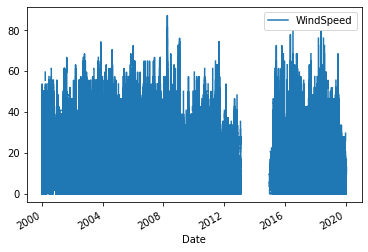

In [4]:
temperature_data.plot(x="Date", y="WindSpeed")

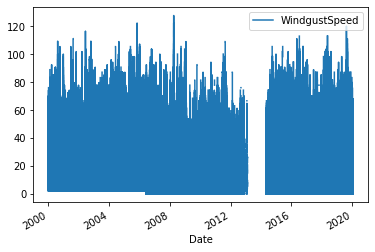

In [5]:
temperature_data.plot(x="Date", y="WindgustSpeed")

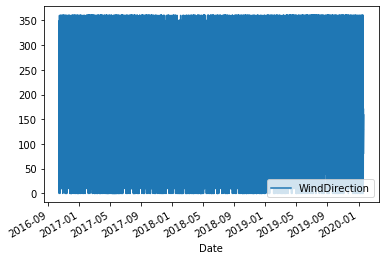

In [6]:
temperature_data.tail(62000).plot(x="Date", y="WindDirection")

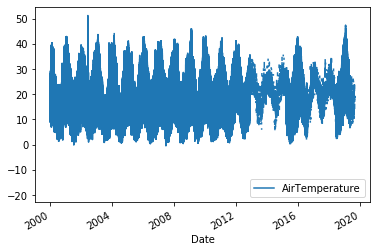

In [7]:
temperature_data.plot(x="Date", y="AirTemperature")

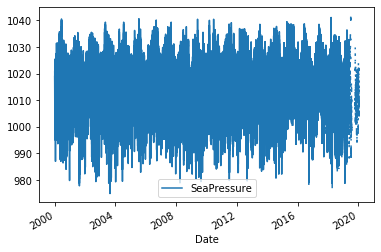

In [8]:
temperature_data.plot(x="Date", y="SeaPressure")

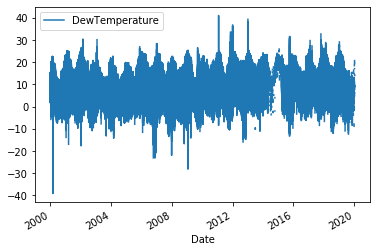

In [9]:
temperature_data.plot(x="Date", y="DewTemperature")

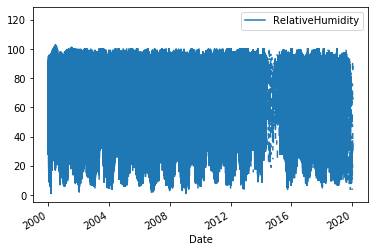

In [10]:
temperature_data.plot(x="Date", y="RelativeHumidity")

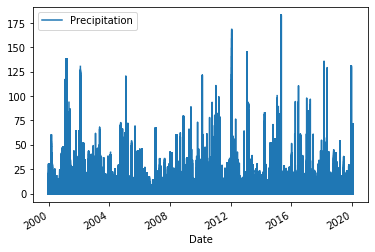

In [11]:
temperature_data.plot(x="Date", y="Precipitation")

## Date vs Total Demand   
A graphical representation of date vs total demand of energy. This information is quite useful as it shows which times of the year you'd expect to see a high demand for energy.

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'TotalDemand')

(array([728659., 730120., 731581., 733042., 734503., 735964., 737425.]),
 <a list of 7 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

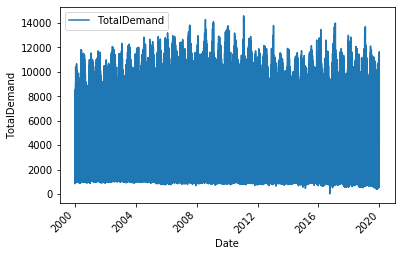

In [12]:
plt.figure()
ax = energy_data.plot(x='Date',y='TotalDemand')
plt.xlabel('Date')
plt.ylabel('TotalDemand')
plt.xticks(rotation=45)
plt.show()

## Air vs Sea and Station Pressure
A graphical representation of air vs sea and station pressure. The comparison between air temperature and pressure over a number of years can be helpful in predicting certain weather patterns as pressure plays a role in the determining the temperature.

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Hectopascals (Hpa)')

(0, 1500)

Text(0.5, 0, 'Date and Time')

(array([728659., 730120., 731581., 733042., 734503., 735964., 737425.,
        738886.]),
 <a list of 8 Text xticklabel objects>)

Text(0, 0.5, 'Degrees Celsius')

(0, 60)

Text(0.5, 1.0, 'StationPressure (red), SeaPressure (blue) and AirTemperature (green) temperatures')

<Figure size 432x288 with 0 Axes>

C:\Users\Javis\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


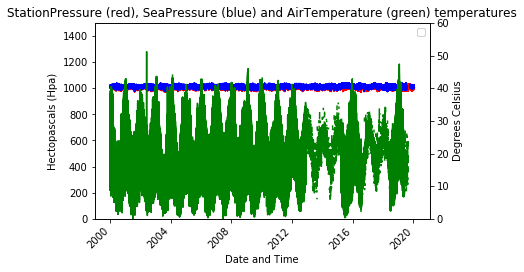

In [13]:
plt.figure()
ax = temperature_data.plot(x='Date',y='StationPressure',color='red')
temperature_data.plot(x='Date',y='SeaPressure',ax=ax,color='blue')
plt.ylabel('Hectopascals (Hpa)')
plt.ylim(0,1500)
plt.xlabel('Date and Time')
plt.xticks(rotation=45)
plt.legend('')

ax2 = ax.twinx()
temperature_data.plot(x='Date',y='AirTemperature',ax=ax2,color='green',legend='None')
plt.ylabel('Degrees Celsius')
plt.ylim(0,60)
plt.legend('')
plt.title('StationPressure (red), SeaPressure (blue) and AirTemperature (green) temperatures')
plt.show()

## Air Temperature vs Total Demand 
A graphical representation of air temperature vs total demand on a monthly basis for each of the four seasons in all states. The comparison between air temperature and total demand for each season and state can be helpful in determining certain correlations between the amount of energy used compared with the temperature on a particular day.

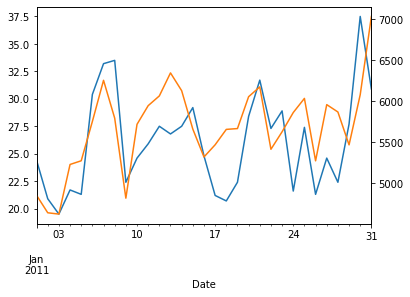

In [14]:
data.groupby("Region").resample("D").max()["AirTemperature"]["VIC"]["2011-01"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["VIC"]["2011-01"].plot(secondary_y=True)

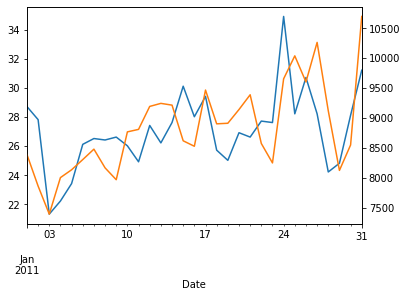

In [15]:
data.groupby("Region").resample("D").max()["AirTemperature"]["NSW"]["2011-01"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["NSW"]["2011-01"].plot(secondary_y=True)

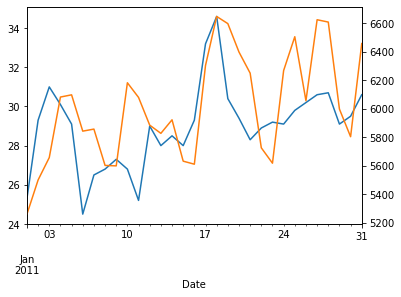

In [16]:
data.groupby("Region").resample("D").max()["AirTemperature"]["QLD"]["2011-01"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["QLD"]["2011-01"].plot(secondary_y=True)

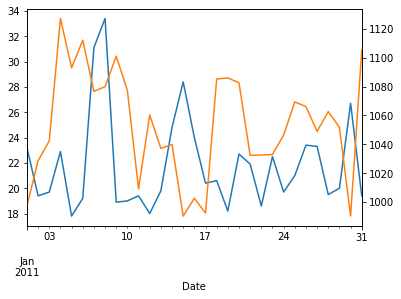

In [17]:
data.groupby("Region").resample("D").max()["AirTemperature"]["TAS"]["2011-01"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["TAS"]["2011-01"].plot(secondary_y=True)

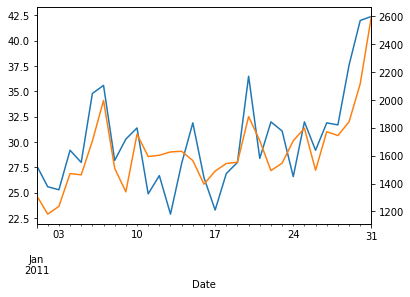

In [18]:
data.groupby("Region").resample("D").max()["AirTemperature"]["SA"]["2011-01"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["SA"]["2011-01"].plot(secondary_y=True)

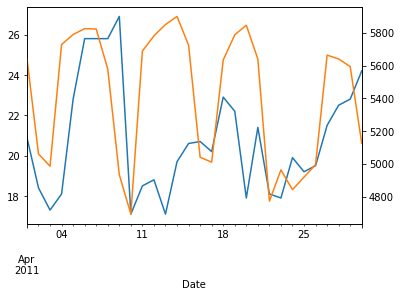

In [19]:
data.groupby("Region").resample("D").max()["AirTemperature"]["VIC"]["2011-04"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["VIC"]["2011-04"].plot(secondary_y=True)

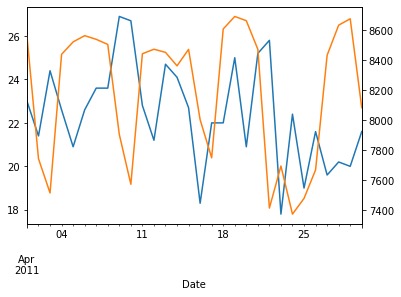

In [20]:
data.groupby("Region").resample("D").max()["AirTemperature"]["NSW"]["2011-04"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["NSW"]["2011-04"].plot(secondary_y=True)

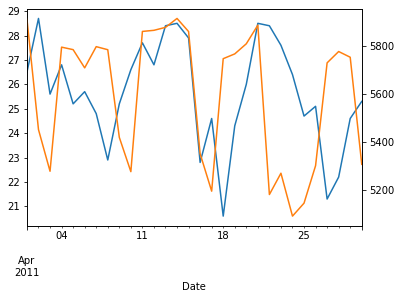

In [21]:
data.groupby("Region").resample("D").max()["AirTemperature"]["QLD"]["2011-04"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["QLD"]["2011-04"].plot(secondary_y=True)

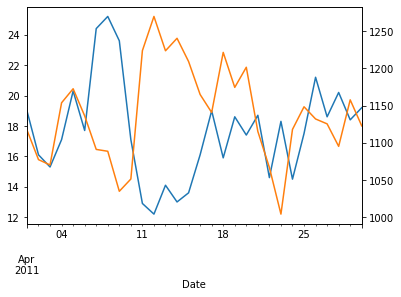

In [22]:
data.groupby("Region").resample("D").max()["AirTemperature"]["TAS"]["2011-04"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["TAS"]["2011-04"].plot(secondary_y=True)

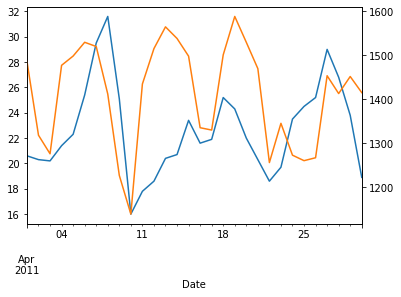

In [23]:
data.groupby("Region").resample("D").max()["AirTemperature"]["SA"]["2011-04"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["SA"]["2011-04"].plot(secondary_y=True)

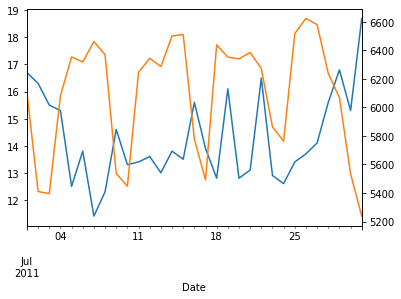

In [24]:
data.groupby("Region").resample("D").max()["AirTemperature"]["VIC"]["2011-07"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["VIC"]["2011-07"].plot(secondary_y=True)

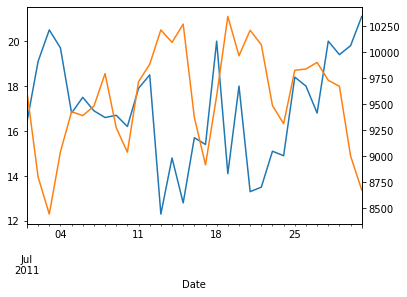

In [25]:
data.groupby("Region").resample("D").max()["AirTemperature"]["NSW"]["2011-07"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["NSW"]["2011-07"].plot(secondary_y=True)

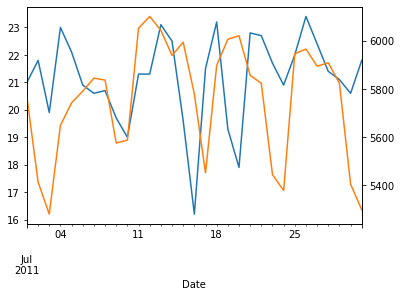

In [26]:
data.groupby("Region").resample("D").max()["AirTemperature"]["QLD"]["2011-07"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["QLD"]["2011-07"].plot(secondary_y=True)

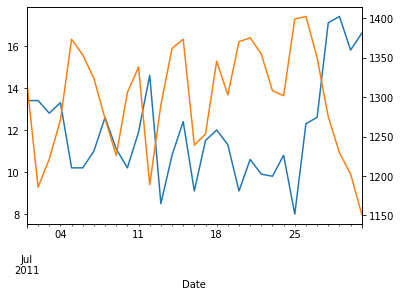

In [27]:
data.groupby("Region").resample("D").max()["AirTemperature"]["TAS"]["2011-07"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["TAS"]["2011-07"].plot(secondary_y=True)

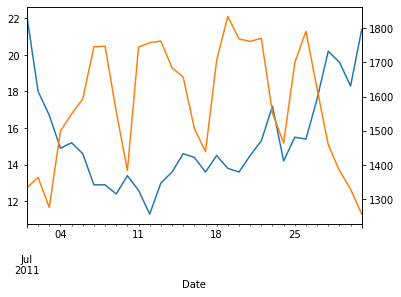

In [28]:
data.groupby("Region").resample("D").max()["AirTemperature"]["SA"]["2011-07"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["SA"]["2011-07"].plot(secondary_y=True)

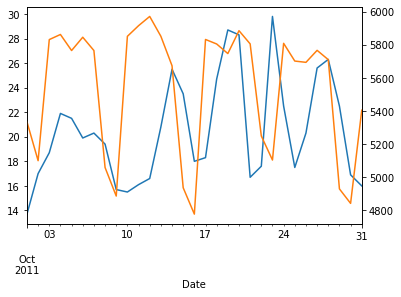

In [29]:
data.groupby("Region").resample("D").max()["AirTemperature"]["VIC"]["2011-10"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["VIC"]["2011-10"].plot(secondary_y=True)

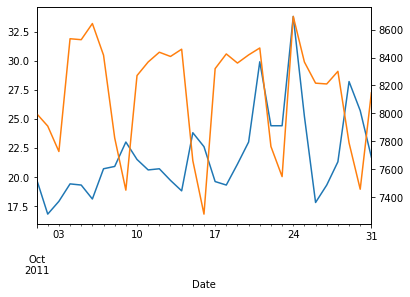

In [30]:
data.groupby("Region").resample("D").max()["AirTemperature"]["NSW"]["2011-10"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["NSW"]["2011-10"].plot(secondary_y=True)

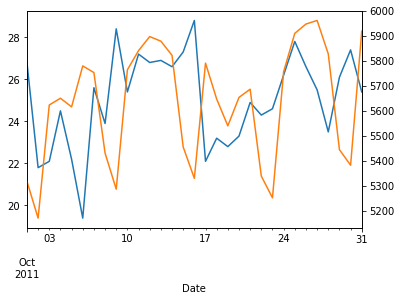

In [31]:
data.groupby("Region").resample("D").max()["AirTemperature"]["QLD"]["2011-10"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["QLD"]["2011-10"].plot(secondary_y=True)

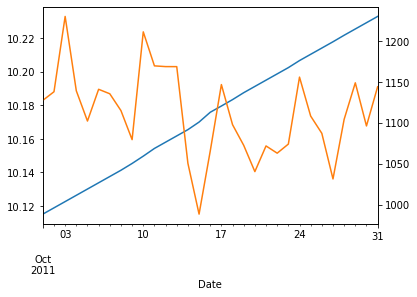

In [32]:
data.groupby("Region").resample("D").max()["AirTemperature"]["TAS"]["2011-10"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["TAS"]["2011-10"].plot(secondary_y=True)

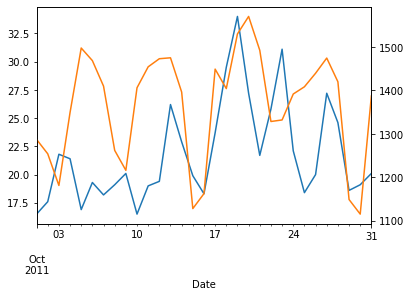

In [33]:
data.groupby("Region").resample("D").max()["AirTemperature"]["SA"]["2011-10"].plot()
data.groupby("Region").resample("D").mean()["TotalDemand"]["SA"]["2011-10"].plot(secondary_y=True)